In [74]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics as skm
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
plt.rcParams["figure.figsize"] = (8, 5)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', None)

In [2]:
df=pd.read_csv('titanic.csv')

In [3]:
df1=df.copy()

In [4]:
df1.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
339,340,0,1,"Blackwell, Mr. Stephen Weart",male,45.000,0,0,113784,35.500,T,S
823,824,1,3,"Moor, Mrs. (Beila)",female,27.000,0,1,392096,12.475,E121,S
92,93,0,1,"Chaffee, Mr. Herbert Fuller",male,46.000,1,0,W.E.P. 5734,61.175,E31,S
397,398,0,2,"McKane, Mr. Peter David",male,46.000,0,0,28403,26.000,NaN,S
75,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.000,0,0,348123,7.650,F G73,S
244,245,0,3,"Attalah, Mr. Sleiman",male,30.000,0,0,2694,7.225,NaN,C
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.896,NaN,C
787,788,0,3,"Rice, Master. George Hugh",male,8.000,4,1,382652,29.125,NaN,Q
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.000,NaN,S
817,818,0,2,"Mallet, Mr. Albert",male,31.000,1,1,S.C./PARIS 2079,37.004,NaN,C


In [5]:
df1.shape

(891, 12)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df1.isnull().sum()/ df1.shape[0]*100

PassengerId    0.000
Survived       0.000
Pclass         0.000
Name           0.000
Sex            0.000
Age           19.865
SibSp          0.000
Parch          0.000
Ticket         0.000
Fare           0.000
Cabin         77.104
Embarked       0.224
dtype: float64

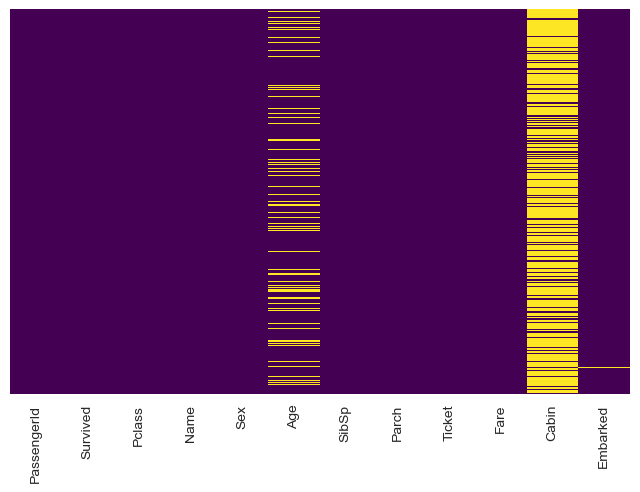

In [9]:
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False,cmap='viridis');

In [10]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.000,446.000,257.354,1.000,223.500,446.000,668.500,891.000
Survived,891.000,0.384,0.487,0.000,0.000,0.000,1.000,1.000
Pclass,891.000,2.309,0.836,1.000,2.000,3.000,3.000,3.000
Age,714.000,29.699,14.526,0.420,20.125,28.000,38.000,80.000
SibSp,891.000,0.523,1.103,0.000,0.000,0.000,1.000,8.000
Parch,891.000,0.382,0.806,0.000,0.000,0.000,0.000,6.000
Fare,891.000,32.204,49.693,0.000,7.910,14.454,31.000,512.329


- AGE

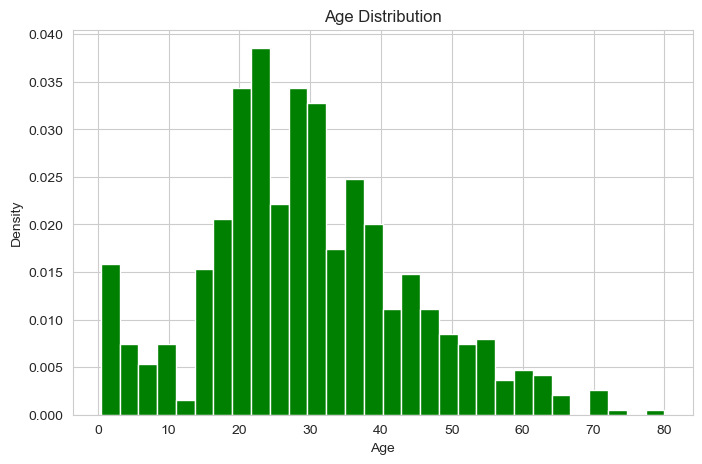

In [11]:
plt.hist(df1['Age'],bins=30,density=True,color='g')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution')
plt.show()

In [12]:
mean = df1['Age'].mean()
mean

29.69911764705882

In [13]:
median= df1['Age'].median()
median

28.0

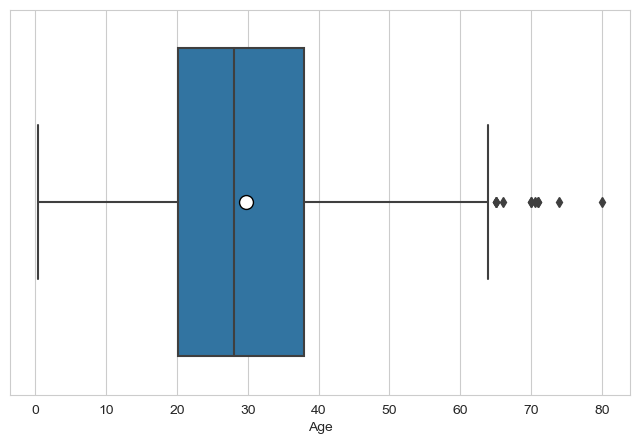

In [14]:
sns.boxplot(data=df1,
            x='Age',
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"});
    

In [15]:
df1.groupby('Pclass').Age.median()

Pclass
1   37.000
2   29.000
3   24.000
Name: Age, dtype: float64

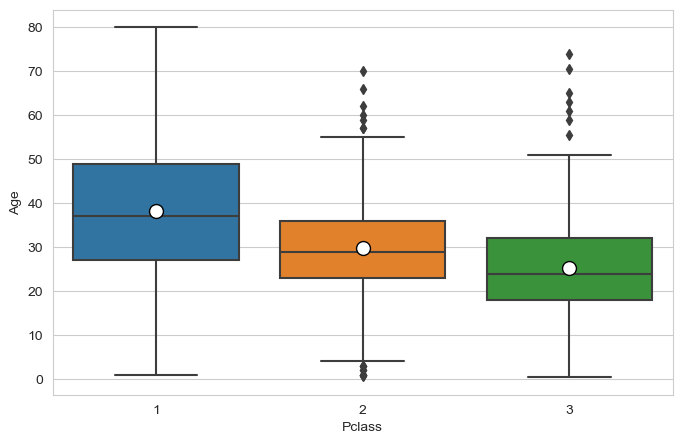

In [16]:
sns.boxplot(data=df1, 
            x='Pclass', 
            y='Age', 
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"});

In [17]:
df1.groupby(['Pclass','Sex']).Age.median()

Pclass  Sex   
1       female   35.000
        male     40.000
2       female   28.000
        male     30.000
3       female   21.500
        male     25.000
Name: Age, dtype: float64

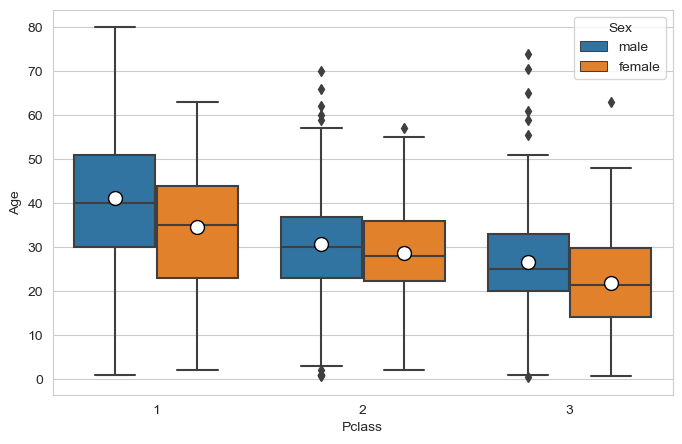

In [18]:
sns.boxplot(data=df1, 
            x='Pclass', 
            y='Age', 
            hue="Sex", 
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"});

In [19]:
x=df1.groupby(['Pclass','Sex']).Age.transform('median')

In [20]:
df1['Age']=df1['Age'].fillna(x)

In [21]:
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- CABIN

In [22]:
df1.drop('Cabin',axis=1,inplace=True)

In [23]:
df1.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
356,357,1,1,"Bowerman, Miss. Elsie Edith",female,22.000,0,1,113505,55.000,S
328,329,1,3,"Goldsmith, Mrs. Frank John (Emily Alice Brown)",female,31.000,1,1,363291,20.525,S
857,858,1,1,"Daly, Mr. Peter Denis",male,51.000,0,0,113055,26.550,S
525,526,0,3,"Farrell, Mr. James",male,40.500,0,0,367232,7.750,Q
387,388,1,2,"Buss, Miss. Kate",female,36.000,0,0,27849,13.000,S


- EMBARKED

In [24]:
df1.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [25]:
df1.dropna(inplace=True)

In [26]:
df1.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

- Survive (Target Future)

In [27]:
df1.Survived.value_counts(normalize=True)


0   0.618
1   0.382
Name: Survived, dtype: float64

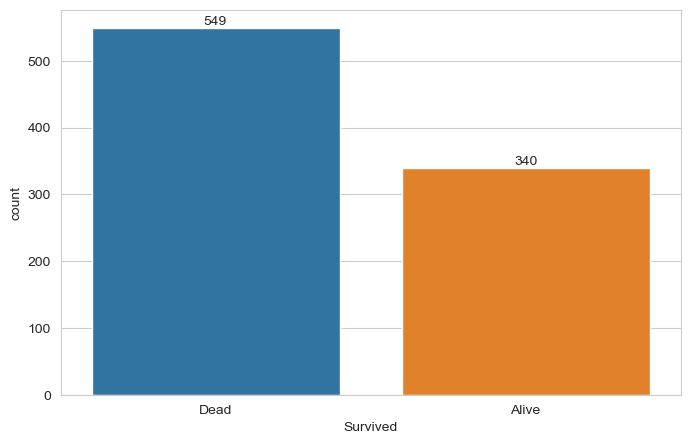

In [28]:
ax = sns.countplot(data=df1, x='Survived')

ax.set_xticklabels(['Dead','Alive'])

for container in ax.containers:
    ax.bar_label(container);

- Sex

In [29]:
df1.groupby("Sex").Survived.value_counts()


Sex     Survived
female  1           231
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

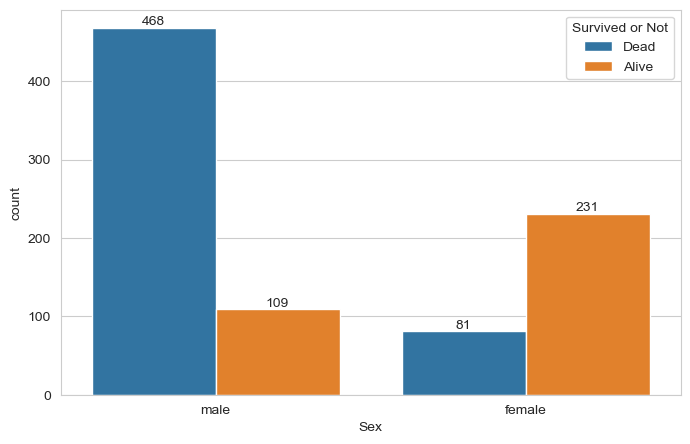

In [30]:
ax = sns.countplot(data=df1, x='Sex', hue='Survived')

plt.legend(title='Survived or Not', loc='upper right', labels=['Dead', 'Alive'])

for container in ax.containers:
    ax.bar_label(container);

In [31]:
df1.groupby("Sex").Survived.value_counts(normalize=True)


Sex     Survived
female  1          0.740
        0          0.260
male    0          0.811
        1          0.189
Name: Survived, dtype: float64

In [32]:
survive = df1.groupby(["Sex"])["Survived"].value_counts(normalize=True)
survive

Sex     Survived
female  1          0.740
        0          0.260
male    0          0.811
        1          0.189
Name: Survived, dtype: float64

In [33]:
survive = pd.DataFrame(survive)
survive.rename(columns = {"Survived": "ratio"}, inplace=True)
survive.reset_index(inplace=True)
survive

,Sex,Survived,ratio
0,female,1,0.740
1,female,0,0.260
2,male,0,0.811
3,male,1,0.189


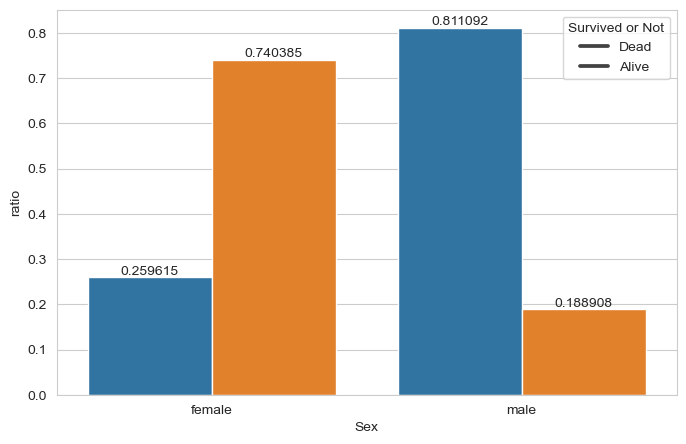

In [34]:
ax = sns.barplot(data=survive, x="Sex", y="ratio", hue="Survived")

plt.legend(title='Survived or Not', loc=0, labels=['Dead', 'Alive'])

for container in ax.containers:
    ax.bar_label(container);   

- Pclass

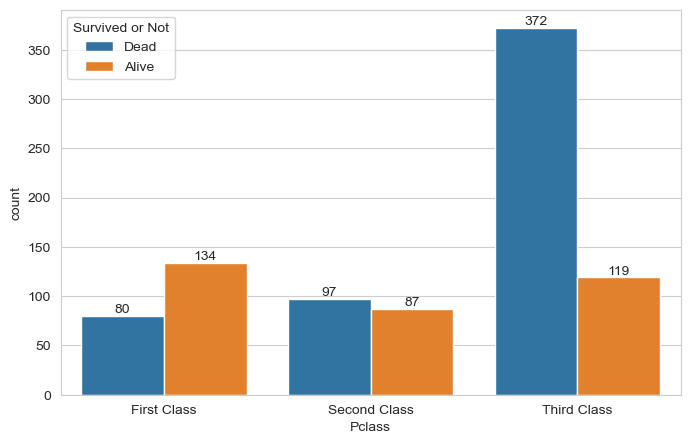

In [35]:
ax = sns.countplot(data=df1, x='Pclass', hue='Survived')

ax.set_xticklabels(['First Class','Second Class', 'Third Class'])

plt.legend(title='Survived or Not', loc=0, labels=['Dead', 'Alive'])

for container in ax.containers:
    ax.bar_label(container);

- Sibsp

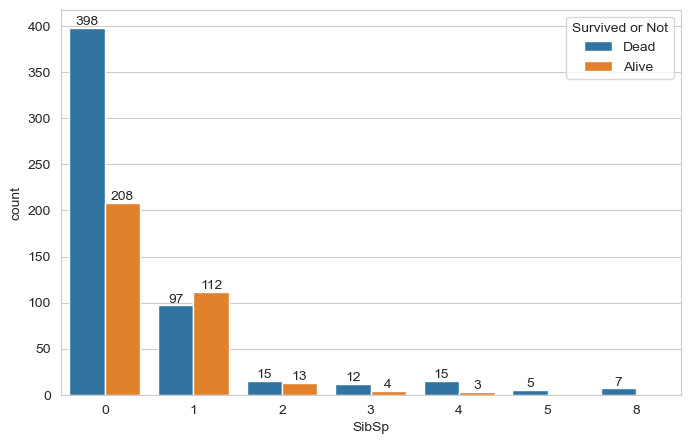

In [36]:
ax = sns.countplot(data=df1, x='SibSp', hue='Survived')

plt.legend(title='Survived or Not', loc='upper right', labels=['Dead', 'Alive'])

for container in ax.containers:
    ax.bar_label(container);

- Parch

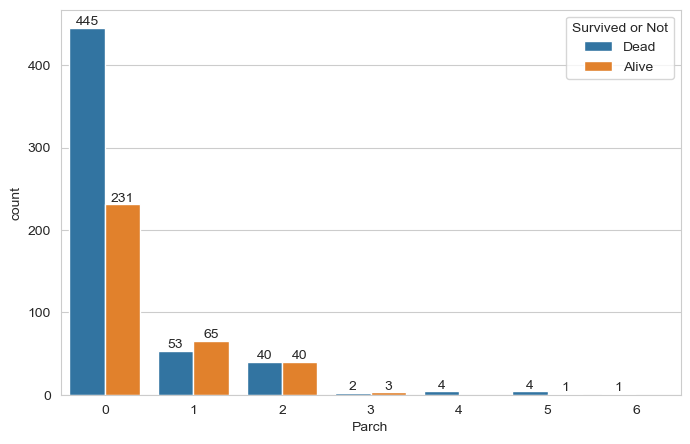

In [37]:
ax = sns.countplot(data=df1, x='Parch', hue='Survived')

plt.legend(title='Survived or Not', loc='upper right', labels=['Dead', 'Alive'])

for container in ax.containers:
    ax.bar_label(container);

- Embarked

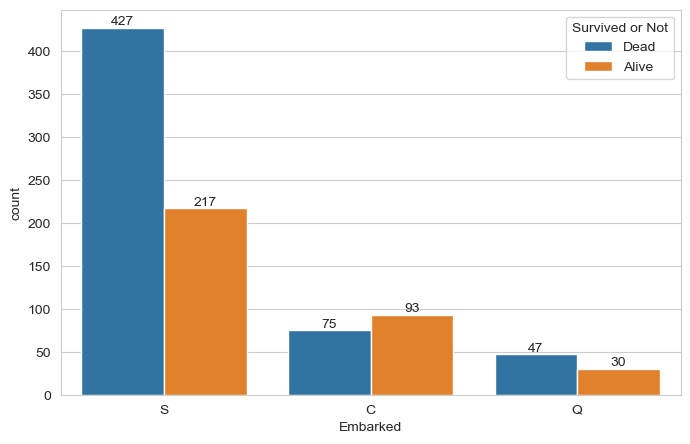

In [38]:
ax = sns.countplot(data=df1, x='Embarked', hue='Survived')

# ax.set_xticklabels(['Southampton','Cherbourg', 'Queenstown'])

plt.legend(title='Survived or Not', loc='upper right', labels=['Dead', 'Alive'])

for container in ax.containers:
    ax.bar_label(container);

- Age

In [39]:
df1.groupby('Survived').Age.median()

Survived
0   25.000
1   27.000
Name: Age, dtype: float64

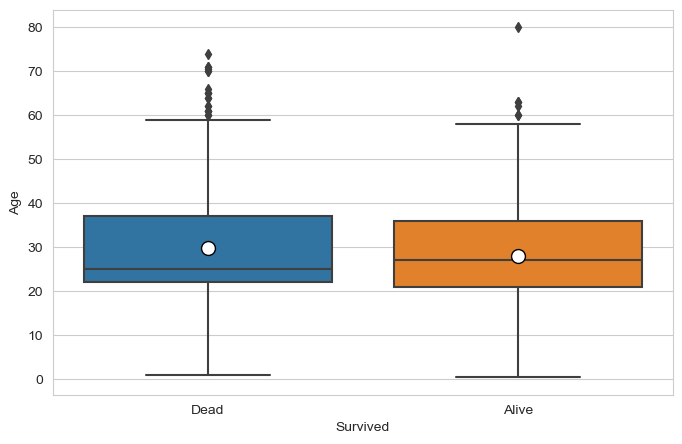

In [40]:
ax = sns.boxplot(data=df1, 
                 x="Survived", 
                 y="Age",
                 showmeans=True,
                 meanprops={"marker":"o",
                            "markerfacecolor":"white", 
                            "markeredgecolor":"black",
                            "markersize":"10"})

ax.set_xticklabels(['Dead','Alive']);

- Fare

In [41]:
df1.groupby("Survived").Fare.median()


Survived
0   10.500
1   26.000
Name: Fare, dtype: float64

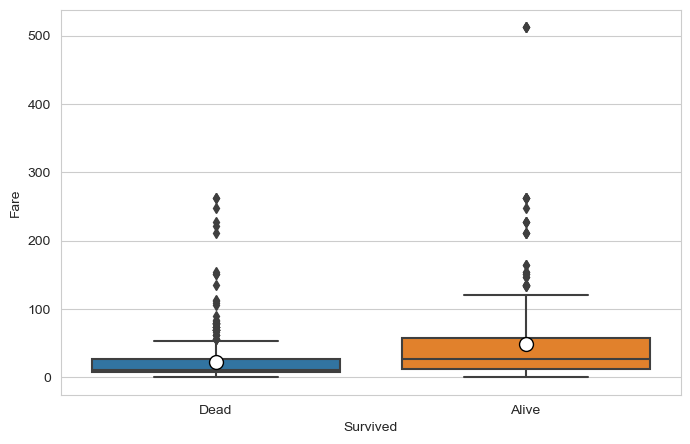

In [42]:
ax = sns.boxplot(data=df1, 
                 x="Survived", 
                 y="Fare",
                 showmeans=True,
                 meanprops={"marker":"o",
                            "markerfacecolor":"white", 
                            "markeredgecolor":"black",
                            "markersize":"10"})

ax.set_xticklabels(['Dead','Alive']);

- From 'Ticekt' to "is_group"

In [43]:
df1.Ticket.value_counts(dropna=False).head(5)


347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
Name: Ticket, dtype: int64

In [44]:
df1.Ticket.value_counts(dropna=False).tail(5)

9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, dtype: int64

In [45]:
ticket = df1.Ticket.value_counts()
ticket

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 680, dtype: int64

In [46]:
ticket[ticket != 1]


347082       7
CA. 2343     7
1601         7
3101295      6
CA 2144      6
            ..
113803       2
2659         2
2661         2
C.A. 2673    2
19943        2
Name: Ticket, Length: 133, dtype: int64

In [47]:
group_list = list(ticket[ticket != 1].index)
group_list

['347082',
 'CA. 2343',
 '1601',
 '3101295',
 'CA 2144',
 '347088',
 'S.O.C. 14879',
 '382652',
 'LINE',
 'PC 17757',
 '17421',
 '349909',
 '113760',
 '4133',
 '113781',
 'W./C. 6608',
 '2666',
 '19950',
 '347077',
 'C.A. 31921',
 'PC 17572',
 'C.A. 34651',
 '363291',
 'F.C.C. 13529',
 '345773',
 '248727',
 '24160',
 '29106',
 'SC/Paris 2123',
 '35273',
 '371110',
 '230080',
 'PC 17760',
 '110413',
 'PC 17755',
 '239853',
 '347742',
 '13502',
 '110152',
 'PC 17582',
 'PC 17604',
 '2665',
 '110465',
 '31027',
 '2908',
 'W./C. 6607',
 'WE/P 5735',
 '250647',
 'PC 17761',
 '35281',
 '113789',
 'PP 9549',
 '244367',
 '231919',
 'C.A. 37671',
 '243847',
 '367226',
 '28403',
 'C.A. 2315',
 '2653',
 '237736',
 '2627',
 '11767',
 '16966',
 '392096',
 'C.A. 33112',
 'A/4 48871',
 'STON/O2. 3101279',
 '2691',
 '2678',
 'PC 17593',
 '7534',
 'PC 17608',
 '347054',
 '358585',
 'PC 17477',
 '113798',
 '2699',
 '2668',
 'PC 17485',
 'P/PP 3381',
 'S.O./P.P. 3',
 'PC 17758',
 'PC 17558',
 '17474',
 '

In [48]:
df1["is_group"] = df1.Ticket.isin(group_list) * 1
df1.is_group

0      0
1      0
2      0
3      1
4      0
      ..
886    0
887    0
888    1
889    0
890    0
Name: is_group, Length: 889, dtype: int64

In [49]:
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,is_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000,0,0,211536,13.000,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000,0,0,112053,30.000,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.500,1,2,W./C. 6607,23.450,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000,0,0,111369,30.000,C,0


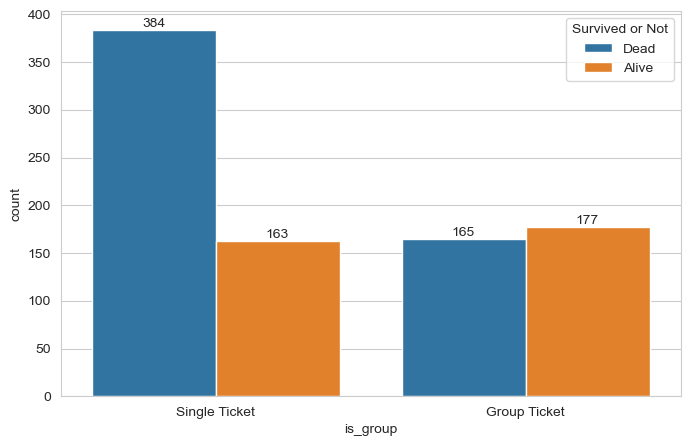

In [50]:
ax = sns.countplot(data=df1, x='is_group', hue='Survived')

plt.legend(title='Survived or Not', loc='upper right', labels=['Dead', 'Alive'])
ax.set_xticklabels(['Single Ticket','Group Ticket'])

for container in ax.containers:
    ax.bar_label(container);

- From "SibSp" and "Parch" to "is_alone"

In [51]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,is_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,S,0


In [52]:
df1["is_alone"] = ((df1.SibSp == 0) & (df1.Parch == 0)) * 1
df1.is_alone

0      0
1      0
2      1
3      0
4      1
      ..
886    1
887    1
888    0
889    1
890    1
Name: is_alone, Length: 889, dtype: int64

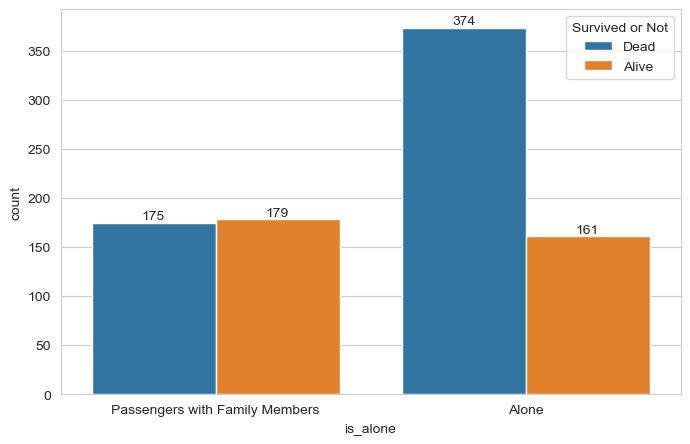

In [53]:
ax = sns.countplot(data=df1, x='is_alone', hue='Survived')

plt.legend(title='Survived or Not', loc='upper right', labels=['Dead', 'Alive'])
ax.set_xticklabels(['Passengers with Family Members', 'Alone'])

for container in ax.containers:
    ax.bar_label(container);

In [54]:
df1["Name"] = df.Name.str.extract("\w+\.\s(\w*\s*\w*)")
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,is_group,is_alone
0,1,0,3,Owen Harris,male,22.000,1,0,A/5 21171,7.250,S,0,0
1,2,1,1,John Bradley,female,38.000,1,0,PC 17599,71.283,C,0,0
2,3,1,3,Laina,female,26.000,0,0,STON/O2. 3101282,7.925,S,0,1
3,4,1,1,Jacques Heath,female,35.000,1,0,113803,53.100,S,1,0
4,5,0,3,William Henry,male,35.000,0,0,373450,8.050,S,0,1


In [55]:
df1["Ticket"] = df1.Ticket.str.extract("(\d*)$")

In [56]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,is_group,is_alone
0,1,0,3,Owen Harris,male,22.000,1,0,21171,7.250,S,0,0
1,2,1,1,John Bradley,female,38.000,1,0,17599,71.283,C,0,0
2,3,1,3,Laina,female,26.000,0,0,3101282,7.925,S,0,1
3,4,1,1,Jacques Heath,female,35.000,1,0,113803,53.100,S,1,0
4,5,0,3,William Henry,male,35.000,0,0,373450,8.050,S,0,1


In [57]:
df_final = df1.drop(['PassengerId', 'Name' , 'Ticket'], axis=1)
df_final

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,is_group,is_alone
0,0,3,male,22.000,1,0,7.250,S,0,0
1,1,1,female,38.000,1,0,71.283,C,0,0
2,1,3,female,26.000,0,0,7.925,S,0,1
3,1,1,female,35.000,1,0,53.100,S,1,0
4,0,3,male,35.000,0,0,8.050,S,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000,0,0,13.000,S,0,1
887,1,1,female,19.000,0,0,30.000,S,0,1
888,0,3,female,21.500,1,2,23.450,S,1,0
889,1,1,male,26.000,0,0,30.000,C,0,1


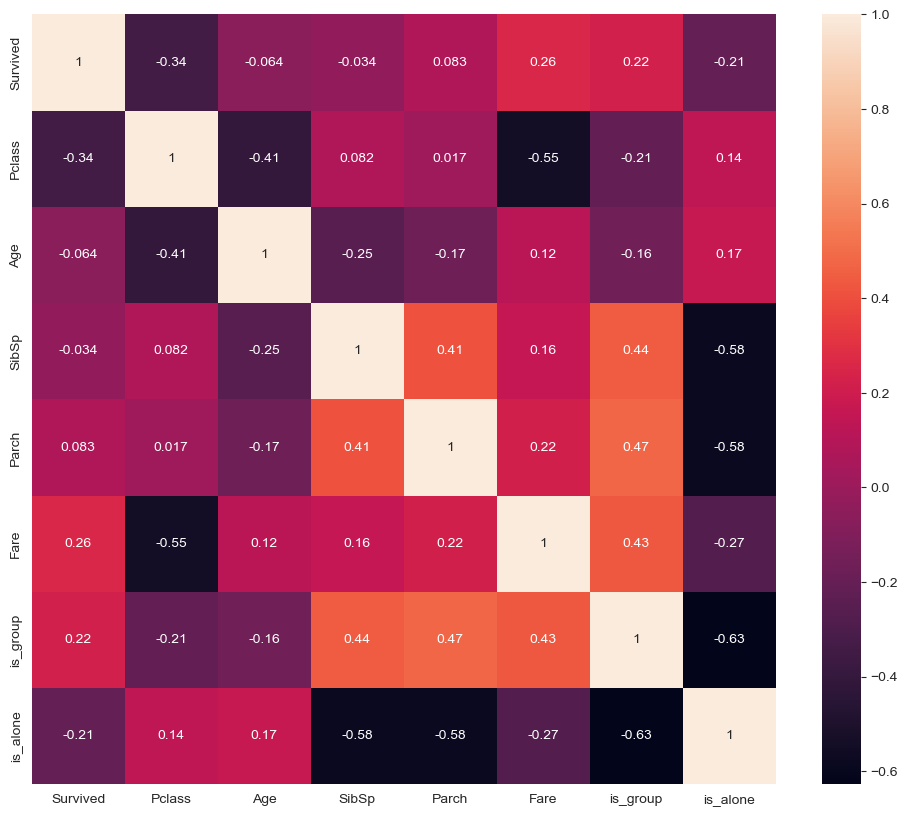

In [58]:
plt.figure(figsize=(12, 10))

sns.heatmap(df_final.corr(), annot=True);

In [59]:
df1_encoded=df1

In [60]:
df1_encoded

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,is_group,is_alone
0,1,0,3,Owen Harris,male,22.000,1,0,21171,7.250,S,0,0
1,2,1,1,John Bradley,female,38.000,1,0,17599,71.283,C,0,0
2,3,1,3,Laina,female,26.000,0,0,3101282,7.925,S,0,1
3,4,1,1,Jacques Heath,female,35.000,1,0,113803,53.100,S,1,0
4,5,0,3,William Henry,male,35.000,0,0,373450,8.050,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,Juozas,male,27.000,0,0,211536,13.000,S,0,1
887,888,1,1,Margaret Edith,female,19.000,0,0,112053,30.000,S,0,1
888,889,0,3,Catherine Helen,female,21.500,1,2,6607,23.450,S,1,0
889,890,1,1,Karl Howell,male,26.000,0,0,111369,30.000,C,0,1


In [61]:
df1_encoded=pd.get_dummies(df1_encoded,columns=['Pclass','Sex','Parch','Embarked',],drop_first=True)

In [62]:
df1_encoded

,PassengerId,Survived,Name,Age,SibSp,Ticket,Fare,is_group,is_alone,Pclass_2,Pclass_3,Sex_male,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_Q,Embarked_S
0,1,0,Owen Harris,22.000,1,21171,7.250,0,0,0,1,1,0,0,0,0,0,0,0,1
1,2,1,John Bradley,38.000,1,17599,71.283,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,Laina,26.000,0,3101282,7.925,0,1,0,1,0,0,0,0,0,0,0,0,1
3,4,1,Jacques Heath,35.000,1,113803,53.100,1,0,0,0,0,0,0,0,0,0,0,0,1
4,5,0,William Henry,35.000,0,373450,8.050,0,1,0,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,Juozas,27.000,0,211536,13.000,0,1,1,0,1,0,0,0,0,0,0,0,1
887,888,1,Margaret Edith,19.000,0,112053,30.000,0,1,0,0,0,0,0,0,0,0,0,0,1
888,889,0,Catherine Helen,21.500,1,6607,23.450,1,0,0,1,0,0,1,0,0,0,0,0,1
889,890,1,Karl Howell,26.000,0,111369,30.000,0,1,0,0,1,0,0,0,0,0,0,0,0


In [63]:
df1_encoded.drop(['Name','PassengerId','Ticket','Fare'],axis=1,inplace=True)

In [64]:
df1_encoded

,Survived,Age,SibSp,is_group,is_alone,Pclass_2,Pclass_3,Sex_male,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_Q,Embarked_S
0,0,22.000,1,0,0,0,1,1,0,0,0,0,0,0,0,1
1,1,38.000,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,26.000,0,0,1,0,1,0,0,0,0,0,0,0,0,1
3,1,35.000,1,1,0,0,0,0,0,0,0,0,0,0,0,1
4,0,35.000,0,0,1,0,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.000,0,0,1,1,0,1,0,0,0,0,0,0,0,1
887,1,19.000,0,0,1,0,0,0,0,0,0,0,0,0,0,1
888,0,21.500,1,1,0,0,1,0,0,1,0,0,0,0,0,1
889,1,26.000,0,0,1,0,0,1,0,0,0,0,0,0,0,0


In [65]:
y=df1_encoded['Survived']

In [66]:
x = df1_encoded.drop('Survived', axis = 1)

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [68]:
tree_model = DecisionTreeClassifier()

In [69]:
x_train

,Age,SibSp,is_group,is_alone,Pclass_2,Pclass_3,Sex_male,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_Q,Embarked_S
574,16.000,0,0,1,0,1,1,0,0,0,0,0,0,0,1
297,2.000,1,1,0,0,0,0,0,1,0,0,0,0,0,1
765,51.000,1,1,0,0,0,0,0,0,0,0,0,0,0,1
866,27.000,1,0,0,1,0,0,0,0,0,0,0,0,0,0
562,28.000,0,0,1,1,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,19.000,1,1,0,0,0,0,0,0,0,0,0,0,0,0
448,5.000,2,1,0,0,1,0,1,0,0,0,0,0,0,0
519,32.000,0,0,1,0,1,1,0,0,0,0,0,0,0,1
836,21.000,0,0,1,0,1,1,0,0,0,0,0,0,0,1


In [70]:
y_train.isnull().sum()

0

In [71]:
tree_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [72]:
y_pred = tree_model.predict(x_test)

In [75]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       106
           1       0.73      0.65      0.69        72

    accuracy                           0.76       178
   macro avg       0.76      0.75      0.75       178
weighted avg       0.76      0.76      0.76       178



In [77]:
forest_model = RandomForestClassifier(n_estimators = 600)

In [78]:
forest_model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=600)

In [79]:
forest_y_pred = forest_model.predict(x_test)

In [80]:
print(classification_report(y_test, forest_y_pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       106
           1       0.75      0.71      0.73        72

    accuracy                           0.79       178
   macro avg       0.78      0.77      0.78       178
weighted avg       0.79      0.79      0.79       178



In [81]:
forest_accuracy = forest_model.score(x_test, y_test)
print('Random Forest Model Accuracy:', forest_accuracy * 100, '%')

Random Forest Model Accuracy: 78.65168539325843 %


In [83]:
features = list(df1_encoded.columns[1:])
features

['Age',
 'SibSp',
 'is_group',
 'is_alone',
 'Pclass_2',
 'Pclass_3',
 'Sex_male',
 'Parch_1',
 'Parch_2',
 'Parch_3',
 'Parch_4',
 'Parch_5',
 'Parch_6',
 'Embarked_Q',
 'Embarked_S']

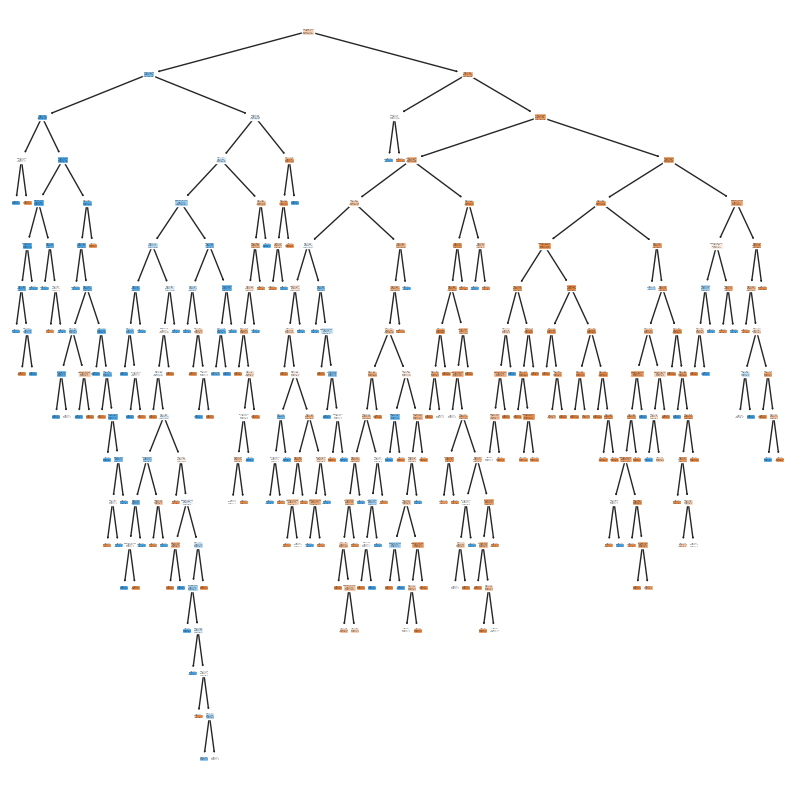

In [84]:
plt.figure(figsize=(10, 10))
tree.plot_tree(tree_model, feature_names=x.columns, filled=True)
plt.savefig('decision_tree_graph.png')
plt.show()
